# Glassdoor Data Challenge

__Notebook written by Patrick Vacek__

This will be my notebook where I provide code and answers to my questions for the Glassdoor Data Challenge. We'll start this notebook by importing some essential packages.

In [34]:
import pandas as pd
import numpy as np
import os
import re

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 7.0)
pd.options.mode.chained_assignment = None
import seaborn as sns

__Reading in the data__

Since we're working with a .xlsx file, reading this in Pandas may be a little tricky. I've placed the file in one of my class folders, so let's extract it from there. We'll read in the _data_ tab and also the _buckets_ tab. The _data_ tab will serve as our primary data and the _buckets_ tab will serve as our auxiliary data.

In [2]:
os.chdir('C:/Users/Patrick Vacek/Desktop/SQ17/STA 160')
glassdoor_data=pd.read_excel('GlassdoorDataSet.xlsx','Data')
buckets=pd.read_excel('GlassdoorDataSet.xlsx','Industry Buckets')

__Question 1:__ How many deals are in the dataset?

Based on the observations in the dataset, each observation (row) is a deal. We can find the number of rows in the dataset by calling the __len()__ function.

In [18]:
len(glassdoor_data)

1636

__Question 2:__ What is the total amount of BaseBY1 sold?

We can start by examining the variable itself, by calling the variable by name, as a Pandas series, we notice that the data type is a float, which means we can perform the __sum()__ function on it.

In [26]:
glassdoor_data.BaseBY1[:10]

0    110400.000
1     17000.000
2    563500.000
3     66700.500
4         0.000
5     60000.000
6     12750.000
7     90000.000
8    300000.000
9    100910.385
Name: BaseBY1, dtype: float64

In [27]:
glassdoor_data.BaseBY1.sum()

170375385.45999998

By round the fraction of cents, we get our answer as __\$170,375,385.46__

Let's move onto the __third question__ now: __which accounts have been customers of Glassdoor the longest?__

In [33]:
glassdoor_data.CustomerStatus.value_counts()

Partner           1101
Past Partner       449
Lapsed Partner      86
Name: CustomerStatus, dtype: int64

We have 3 distinct categories. It seems apparent that ongoing partnerships fall under the "Partner" category, so we'll subset by that.

In [39]:
#Subset the data to the partner status being current
current_partners=glassdoor_data[glassdoor_data["CustomerStatus"]=="Partner"]
#For sanity check purposes, sort the data by first customer date
current_partners.sort_values(by="FirstCustomerDate").head()

,CloseDate,AgencyOfRecord,WinNumber,AccountName,FirstCustomerDate,OppOwnerName,OppOwnerTeam,CustomerStatus,Industry,AverageContractTerm,...,MaxEndDate,BaselineSubscriptionBY1,BaselineNonSubscriptionBY1,SubscriptionOppsRenewing,NonSubscriptionOppsRenewing,RenewalBY1,RenewalSubscriptionBY1,RenewalNonSubscriptionBY1,SubscriptionOppsRenewed,NonSubscriptionOppsRenewed
4,2011-11-22,NaN,4,Alphafax,2010-04-22,Melissa Garrett,US Large Biz Growth,Partner,Technology,12.0,...,2014-01-03,0.0,0.0,0,0,0.0,0.0,0.0,NaN,NaN
5,2013-07-29,NaN,7,Zoocorporation LLC,2010-04-22,Miranda Schmidt,US Medium Biz Growth,Partner,Consulting,12.0,...,2014-08-04,60000.0,0.0,1,0,150000.0,150000.0,0.0,1.0,0.0
6,2014-01-08,NaN,9,Zoocorporation LLC,2010-04-22,Miranda Schmidt,US Medium Biz Growth,Partner,Consulting,3.0,...,2014-03-31,0.0,12750.0,0,1,0.0,0.0,0.0,NaN,NaN
7,2013-06-25,NaN,5,Gogoware Partners,2010-04-28,Luke Gomez,US Medium Biz Growth,Partner,Communications,12.0,...,2014-06-30,90000.0,0.0,1,0,210000.0,150000.0,60000.0,1.0,1.0
8,2013-12-12,NaN,6,Tampplus,2010-05-10,Ann Rowe,US Medium Biz Growth,Partner,Other,12.0,...,2014-12-31,100000.0,200000.0,1,1,0.0,0.0,0.0,NaN,NaN


By examining the head of the dataframe, we observe that __Alphafax__ and __Zoocorporation LLC__ are tied in account age. So those are the two customers that have been here the longest. Onto the next question.

__What is the ratio of subscription baseline BY1 to non-subscription baseline BY1?__

In [46]:
#Do as we did in problem 2 (with pandas summation), but do it for each column and divide the sum afterwards.
glassdoor_data.BaselineSubscriptionBY1.sum()/glassdoor_data.BaselineNonSubscriptionBY1.sum()

1.5072842085900928

Our answer appears to be __1.507__. Onto question 5: __How many deals in the data set did the Staffing Agency team book?__

Based on the field names, it appears that the staffing team falls under the _'OppOwnerTeam'_ variable. Now, let's check its table:

In [51]:
glassdoor_data.OppOwnerTeam.value_counts()

US Large Biz Growth         548
US Medium Biz Growth        336
US Small Biz Growth         303
US Large Biz Hunter         155
US Small Biz Hunters        143
US Medium Biz Hunter         97
Staffing Agencies            25
US Very Small Biz Growth     12
Europe Large Biz Hunter      12
Europe Small Biz Growth       4
Europe Large Biz Growth       1
Name: OppOwnerTeam, dtype: int64

The 'Staffing Agencies' team appears __25__ times, which is our answer. Next question: __What date has the most end dates fall on it?__

We will examine the _'MaxEndDate'_ variable for this question. Once again, we can examine a table and look at the counts.

In [53]:
glassdoor_data.MaxEndDate.value_counts()[:10]

2014-12-31    300
2014-06-30     71
2014-01-31     65
2014-09-30     45
2014-07-31     36
2014-08-31     35
2014-03-31     35
2014-02-28     32
2014-10-31     26
2014-04-30     26
Name: MaxEndDate, dtype: int64

Based on our table, the date that has the most end dates is __December 31, 2014__. Seventh question: __What agency of record has the highest average BaseBY1?__

Now we will have to do some group operations. We'll by examining the _'AgencyOfRecord'_ variable here. We can do a groupby in Pandas with the __groupby()__ function, then we select the variable and call the __mean()__ function. We'll need to sort our table, so we'll save it first.

In [72]:
agency_BY1=glassdoor_data.groupby("AgencyOfRecord").BaseBY1.mean()
agency_BY1[agency_BY1.values.argsort()[::-1]]

AgencyOfRecord
Boy & Scarecrow      977500.115000
Parent & Board       371450.000000
Lamb & Diamond       366863.128750
Vest & Marlin        359698.833333
Cream & Dinner       346972.930000
Hobby & Veil         243809.417500
Brother & Book       212500.000000
Linen & Coach        177243.767500
Bedroom & Nest       170348.247500
Geese & Beauty       152128.920000
Desk & Vapor         151725.000000
Cobalt & Cord        148345.963125
Whale & Temper       140058.284233
Crate & Kerning      139643.403571
Loon & Nation        127750.000000
Battle & Stars       127500.000000
Fern & Garnet        124034.975000
Buoy & Home          113191.666667
Spigot & Field       108375.000000
Victim & Steam        99115.243438
Geese & Music         87797.151667
Vase & Marlin         86374.652188
Maid & Parsley        84322.592500
Wharves & Camphor     84150.000000
Village & Meat        80339.830455
Whale & Mushroom      79615.536481
Amber & Hearth        70380.000000
Robin & Hearth        65025.000000
Jacka

Thus, our answer is __Boy & Scarecrow__.

Onto the eigth question: __How much larger, on average are US Large Biz Hunter deals than US Small Biz Hunter deal (by BaseBY1)?__

We'll be using the groupby functionality again for this. Our strategy is to get a table of mean _'BaseBY1'_ for the _'OppOwnerTeam'_ variable, and then subtracting the difference between the two categories.

In [80]:
team_BY1=glassdoor_data.groupby("OppOwnerTeam").BaseBY1.mean()
team_BY1["US Large Biz Hunter"]-team_BY1["US Small Biz Hunters"]

42383.026181367037

Thus, US Large Biz Hunter deals are on average __\$42,383.03__ larger. Upcoming question: __What rep had the most banking deals?__ For this question, we will assume that "rep" means someone who is a sales representative. So we'll use the _'OppOwnerName'_ variable.

In [84]:
banking_sales=glassdoor_data[glassdoor_data["Industry"]=="Banking"]
banking_sales.OppOwnerName.value_counts()

Heidi Dennis        5
Brandon Scott       4
Santos Simmons      3
Myron Hines         2
Annette Chavez      2
Kenny Fox           2
Sherman Harper      2
Ann Rowe            1
Manuel Jennings     1
Pedro Wise          1
Rochelle Walters    1
Abraham Powell      1
Preston Shelton     1
Name: OppOwnerName, dtype: int64

It is apparent that __Heidi Dennis__ has made the most banking sales. Now onto question 10: __What is the average win number for deals that have an agency of record, weighted by BaseBY1?__

The question is a little bit ambiguous for me, so I will assume that it is asking for a weighted mean, which means we multipy the two variables together, sum the product and then divide by the size of the subset.

In [146]:
#Since the column is a bit irregular, we need to convert it to a string, then remove NA with the contains() function
entries_with_agencies=glassdoor_data.AgencyOfRecord.str.contains('.',na=False)
#The period is a regex wildcard operator
agency_data=glassdoor_data[entries_with_agencies]
weighted_win=agency_data.WinNumber*agency_data.BaseBY1
weighted_win.mean()

565330.8010840707

Therefore, our answer is __\$565,330.80__. Our next question is: __What Industry Bucket has the smallest average BaseBY1?__

We know that the _'Industry Bucket'_ variable is in a separate dataset called __buckets__. We'll need to map the _'Industry'_ variable to its corresponding bucket. We can do this pretty easily in Python with a dictionary. We'll use the __map()__ function  to create the new variable _'Bucket'_ inside the main dataset.

Afterwards, we'll use a __groupby()__ and get the mean BaseBY1, and then observe.

In [164]:
#Make the dictionary, the keys are the industry and the values are the corresponding buckets
buckets_dict=dict(zip(buckets["Industry"],buckets["Industry Bucket"]))
#Create the variable with the map function
glassdoor_data["Bucket"]=glassdoor_data.Industry.map(buckets_dict)
#Use groupby to make the table
glassdoor_data.groupby("Bucket").BaseBY1.mean()

Bucket
Financial and Professional Services               104164.412600
Government/Non-Profit                             147938.083158
Healthcare and Pharmaceuticals                     86607.134188
Labor/Manufacturing/Chemicals                     136507.694498
Other                                              90477.852534
Retail/Food/Real Estate                            97291.864379
Tech/Telco/IT/Electronics                          96127.987111
Travel/Transportation/Education/Entertaintment     99528.139359
Name: BaseBY1, dtype: float64

Based on our table, the __Healthcare and Pharmaceuticals__ bucket has the smallest average BaseBY1. Question 12: __What month (by close date) has the greatest total RenewalBY1 to Base BY1 ratio?__

In [196]:
glassdoor_data["CloseMonth"]=glassdoor_data.CloseDate.dt.to_period("M")
renewal_base_ratios=glassdoor_data.groupby("CloseMonth").RenewalBY1.sum()/glassdoor_data.groupby("CloseMonth").BaseBY1.sum()
renewal_base_ratios[renewal_base_ratios.argsort()][::-1]

CloseMonth
2014-12         inf
2012-08    4.737063
2014-11    3.471039
2012-09    2.734389
2012-01    2.244585
2012-07    2.046374
2014-03    1.875846
2012-12    1.740285
2014-01    1.708416
2014-02    1.696731
2014-09    1.692269
2014-10    1.552559
2014-05    1.540981
2014-07    1.433828
2012-10    1.404101
2012-11    1.393632
2014-06    1.331533
2013-04    1.312847
2013-01    1.295197
2013-07    1.261941
2013-06    1.198071
2014-08    1.197529
2013-03    1.145731
2013-08    1.127379
2013-12    1.071291
2013-02    1.063721
2012-03    0.994759
2013-09    0.954051
2013-05    0.945160
2013-10    0.924849
2013-11    0.895115
2014-04    0.686462
2012-05    0.129844
2012-06    0.000000
2011-11    0.000000
Freq: M, dtype: float64

Our answer is __August 2012__. I am not counting December 2014 because there is likely an insufficient amount of data. Next question: __What consecutive 7 day period (by close date) had the most BaseBY1 sold? (Give me just the first day. Not all 7 days must have sales)__ This one was a tricky one, and it took a while. I had to look up some documentation at this point to get the answer.

In [263]:
BY1_by_day=glassdoor_data.groupby('CloseDate').BaseBY1.sum()
offsets=BY1_by_day.index+pd.tseries.offsets.Week()
weekly_sums=np.array([BY1_by_day[BY1_by_day.index<=o].sum() for o in offsets])
start_of_largest_sum=offsets[np.argmax(weekly_sums)]-pd.tseries.offsets.Week()
start_of_largest_sum

Timestamp('2014-11-11 00:00:00')

Our answer is __November 11 2014__. At this point, I was out of time. I decided that the last two questions would not be worth answering as I would have to keep using documentation to write my solutions, instead of doing it automatically.

# Data Exploration (~2 hours)

When I start this, I'll be sitting down for 2 hours and attempting to provide interesting insights for this dataset.

__How are the continuous variables related?__ We will develop a correlation heatmap to see which continuous variables are correlated and uncorrelated. We'll need to do 3 things here:

1. Determine which variables are continuous

2. Examine the missingness of the continuous variables

3. Based on the results, 1. and 2., we'll examine the selected variables and see if they are correlated or not.

__Subsetting by continuous variables__

In [6]:
glassdoor_data.dtypes

CloseDate                      datetime64[ns]
AgencyOfRecord                         object
WinNumber                               int64
AccountName                            object
FirstCustomerDate              datetime64[ns]
OppOwnerName                           object
OppOwnerTeam                           object
CustomerStatus                         object
Industry                               object
AverageContractTerm                   float64
BaseBY1                               float64
MaxEndDate                     datetime64[ns]
BaselineSubscriptionBY1               float64
BaselineNonSubscriptionBY1            float64
SubscriptionOppsRenewing                int64
NonSubscriptionOppsRenewing             int64
RenewalBY1                            float64
RenewalSubscriptionBY1                float64
RenewalNonSubscriptionBY1             float64
SubscriptionOppsRenewed               float64
NonSubscriptionOppsRenewed            float64
dtype: object

In [49]:
glassdoor_cont=glassdoor_data.select_dtypes(include=['float64','int64'])

__Examining missingness__

We know from the looking at the data earlier, that a large set of the missing values were set to 0 when we read the data in, so we'll have to account for that too. It appears that the subscription related variables are binary, so we'll need to set them back to 0 after replacing are nan values.

In [50]:
subopps_cols=glassdoor_cont.columns.str.contains('SubscriptionOpps')
glassdoor_cont_na=glassdoor_cont.loc[:,subopps_cols==False].replace(0,np.nan)
glassdoor_cont=pd.concat([glassdoor_cont_na,glassdoor_cont.loc[:,subopps_cols==True]],axis=1)
glassdoor_cont.isnull().sum()

WinNumber                         2
AverageContractTerm              11
BaseBY1                          68
BaselineSubscriptionBY1         466
BaselineNonSubscriptionBY1      917
RenewalBY1                      666
RenewalSubscriptionBY1          758
RenewalNonSubscriptionBY1      1277
SubscriptionOppsRenewing          0
NonSubscriptionOppsRenewing       0
SubscriptionOppsRenewed         666
NonSubscriptionOppsRenewed      666
dtype: int64

__Summary statistics__

In [53]:
glassdoor_cont.describe().T

,count,mean,std,min,25%,50%,75%,max
WinNumber,1634.0,2.816401,3.100572,1.000,1.000000,2.000,3.00000,29.0
AverageContractTerm,1625.0,8.679921,4.107092,1.000,5.333333,10.000,12.00000,29.0
BaseBY1,1568.0,108657.771339,107318.278263,0.115,50928.750000,82800.000,121074.15000,1451806.0
BaselineSubscriptionBY1,1170.0,87492.467620,54653.409495,1076.525,55000.000000,78115.000,106137.50000,586500.0
BaselineNonSubscriptionBY1,719.0,94456.638866,115325.970614,0.115,30000.000000,60000.000,114875.00000,1451806.0
RenewalBY1,970.0,207062.634289,210808.576683,3400.000,86362.500000,138000.115,253831.69625,2185000.0
RenewalSubscriptionBY1,878.0,158557.366418,118034.227645,0.085,85430.086250,126500.000,189750.00000,1085000.0
RenewalNonSubscriptionBY1,359.0,171691.887312,192232.450243,0.230,51000.000000,117300.000,212500.00000,1437500.0
SubscriptionOppsRenewing,1636.0,0.715770,0.451185,0.000,0.000000,1.000,1.00000,1.0
NonSubscriptionOppsRenewing,1636.0,0.439487,0.496476,0.000,0.000000,0.000,1.00000,1.0


__Correlation heatmap__

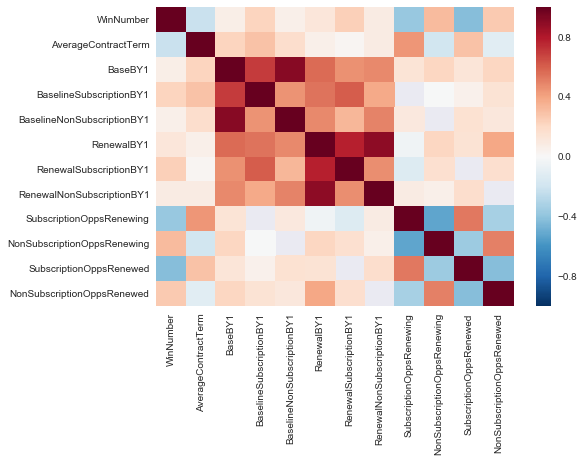

In [58]:
glasscorr=glassdoor_cont.corr()
sns.heatmap(glasscorr)
plt.show()

Based on our heatmap, there is not too much going on here. As expected, the revenue related variables are all fairly correlated. Some of these variables appear to be linear combinations of eachother, which may explain the values.

__How are the categorical variables related?__

We will need to see the number of categories per variable, and then based on that we can start developing some relationships.

In [267]:
buckets_dict=dict(zip(buckets["Industry"],buckets["Industry Bucket"]))
glassdoor_data["Bucket"]=glassdoor_data.Industry.map(buckets_dict)
glassdoor_cat=glassdoor_data.select_dtypes(include=['object'])
glassdoor_cat.describe().T

,count,unique,top,freq
AgencyOfRecord,452,35,Whale & Temper,202
AccountName,1636,1191,Highplanet Co,16
OppOwnerName,1636,127,Ebony Moran,67
OppOwnerTeam,1636,11,US Large Biz Growth,548
CustomerStatus,1636,3,Partner,1101
Industry,1636,73,Consulting,133
Bucket,1636,8,Financial and Professional Services,473


__Are certain industry buckets more likely to change customer status?__

Let's examine a simple contingency table.

In [107]:
pd.crosstab(glassdoor_cat.Bucket,glassdoor_cat.CustomerStatus)

CustomerStatus,Lapsed Partner,Partner,Past Partner
Bucket,,,
Financial and Professional Services,24,312,137
Government/Non-Profit,0,14,5
Healthcare and Pharmaceuticals,2,89,26
Labor/Manufacturing/Chemicals,21,152,56
Other,2,45,26
Retail/Food/Real Estate,12,116,49
Tech/Telco/IT/Electronics,20,304,107
Travel/Transportation/Education/Entertaintment,5,69,43


We notice that the lapsed partner category is a bit sparse here and isn't providing much information. So we'll convert it to past partner for now.

In [109]:
partner=glassdoor_cat.CustomerStatus.map(dict({'Lapsed Partner':'Past Partner','Partner':'Partner','Past Partner':'Past Partner'}))

In [121]:
bucket_cust=pd.crosstab(glassdoor_cat.Bucket,partner)
bucket_cust.div(bucket_cust.sum(axis=1),axis=0)

CustomerStatus,Partner,Past Partner
Bucket,,
Financial and Professional Services,0.659619,0.340381
Government/Non-Profit,0.736842,0.263158
Healthcare and Pharmaceuticals,0.760684,0.239316
Labor/Manufacturing/Chemicals,0.663755,0.336245
Other,0.616438,0.383562
Retail/Food/Real Estate,0.655367,0.344633
Tech/Telco/IT/Electronics,0.705336,0.294664
Travel/Transportation/Education/Entertaintment,0.589744,0.410256


It appears that the travel industry is significantly more likely to be a past partner.

__Exploring the WinNumber and how it affects sales__

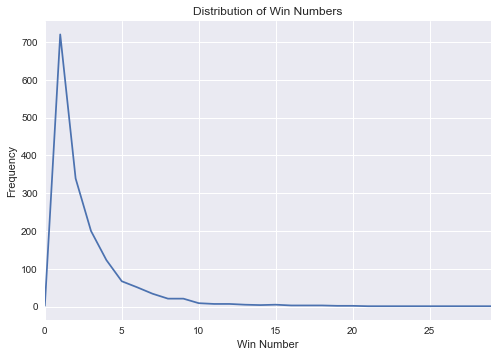

In [164]:
WN_counts=glassdoor_data.WinNumber.value_counts()
WN_counts=WN_counts[np.sort(WN_counts.index.values)]
WN_counts.plot()
plt.title("Distribution of Win Numbers")
plt.xlabel("Win Number")
plt.ylabel("Frequency")
plt.show()

In [170]:
WinCat=pd.cut(glassdoor_data.WinNumber,bins=[0,1,2,3,4,np.Inf],labels=["1","2","3","4","5+"])
glassdoor_data["WinCat"]=WinCat

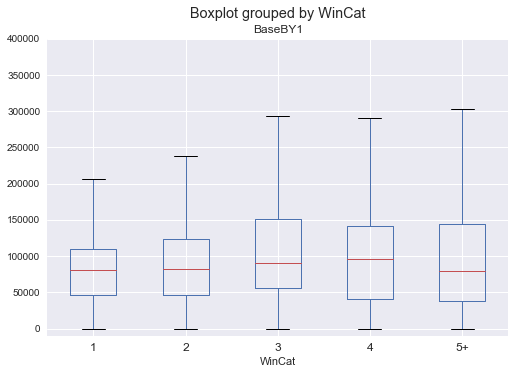

In [178]:
glassdoor_data.boxplot("BaseBY1","WinCat")
plt.ylim(-10000,400000)
plt.show()

__Examining Opportunity Renewal__

We'll start by only looking at deals that have a renewal opportunity. Let's start by looking at the tables for renewals.

In [193]:
pd.crosstab(glassdoor_data.SubscriptionOppsRenewing,glassdoor_data.SubscriptionOppsRenewed)

SubscriptionOppsRenewed,0.0,1.0
SubscriptionOppsRenewing,,
0,81,128
1,11,750


In [194]:
pd.crosstab(glassdoor_data.NonSubscriptionOppsRenewing,glassdoor_data.NonSubscriptionOppsRenewed)

NonSubscriptionOppsRenewed,0.0,1.0
NonSubscriptionOppsRenewing,,
0,479,99
1,132,260


In [201]:
renewal_data=glassdoor_data[glassdoor_data["NonSubscriptionOppsRenewing"]==1]
renewal_data=renewal_data[renewal_data["NonSubscriptionOppsRenewed"].isnull()==False]
renewal_data["Renewed"]=renewal_data["NonSubscriptionOppsRenewed"]

__Examining Win Number and Renewal__

In [208]:
Win_renewal=pd.crosstab(renewal_data.WinCat,renewal_data.Renewed)
Win_renewal.div(Win_renewal.sum(axis=1),axis=0)

Renewed,0.0,1.0
WinCat,,
1,0.447552,0.552448
2,0.341772,0.658228
3,0.373134,0.626866
4,0.266667,0.733333
5+,0.109589,0.890411


The renewal rate goes up signficantly as the Win number increases.

__Examining renewal and continuous variables__

In [241]:
renewal_means=renewal_data.select_dtypes(include=['float64']).groupby("Renewed").mean().T.iloc[:-4,:]

Renewed,0.0,1.0
AverageContractTerm,9.418939,8.154381
BaseBY1,144696.293939,163135.891538
BaselineSubscriptionBY1,59150.330985,51302.810346
BaselineNonSubscriptionBY1,84827.212955,111833.081192
RenewalBY1,190401.601174,298509.792500


In [250]:
vars_to_test=renewal_means.index.values

In [266]:
from scipy.stats import ttest_ind
renewed=renewal_data[renewal_data["Renewed"]==1]
non_renewed=renewal_data[renewal_data["Renewed"]==0]
t_tests=[np.array(ttest_ind(renewed[v],non_renewed[v])) for v in vars_to_test]
t_test_df=pd.DataFrame(np.vstack(t_tests),index=vars_to_test,columns=["t*","p-value"])
t_test_df

,t*,p-value
AverageContractTerm,-2.895117,0.004003
BaseBY1,1.114439,0.265777
BaselineSubscriptionBY1,-1.005129,0.315458
BaselineNonSubscriptionBY1,2.225193,0.026640
RenewalBY1,3.957963,0.000090


Based on our t tests, it appears that __Contract Term__, __Non Subscription Revenue__ and __Renewal Revenue__ significantly affect the outcome of non-subscription renewal.